In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
from IPython.display import Markdown as md

%matplotlib inline

# General

(c) Junqui Liu and Carlos Contreras, January 2021

In [2]:
# Case data
req = Request('https://www.alberta.ca/data/stats/covid-19-alberta-statistics-data.csv')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)
data = pd.read_csv(content)

In [3]:
data['Date reported'] = pd.to_datetime(data['Date reported'], format='%Y-%m-%d')

In [4]:
data.head()

,Unnamed: 0,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
0,1,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
1,2,2021-04-21,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
2,3,2021-05-17,North Zone,Male,10-19 years,Recovered,Confirmed
3,4,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed
4,5,2021-01-05,Central Zone,Male,50-59 years,Recovered,Confirmed


In [5]:
print(data.shape)
NUM_PATIENTS = data.shape[0]
print(max(data['Date reported']))
LAST_DATE = max(data['Date reported'])
md("This data set contains {} patients and 6 features (as of {})".format(NUM_PATIENTS,LAST_DATE.strftime('%B %d, %Y')))

(247786, 7)
2021-08-25 00:00:00


This data set contains 247786 patients and 6 features (as of August 25, 2021)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247786 entries, 0 to 247785
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    247786 non-null  int64         
 1   Date reported                 247786 non-null  datetime64[ns]
 2   Alberta Health Services Zone  247786 non-null  object        
 3   Gender                        247786 non-null  object        
 4   Age group                     247786 non-null  object        
 5   Case status                   247786 non-null  object        
 6   Case type                     247786 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 13.2+ MB


In [7]:
data.describe(include = [object])

,Alberta Health Services Zone,Gender,Age group,Case status,Case type
count,247786,247786,247786,247786,247786
unique,6,3,12,3,2
top,Calgary Zone,Male,30-39 years,Recovered,Confirmed
freq,100249,125659,47420,236360,245079


In [8]:
data.dtypes

Unnamed: 0                               int64
Date reported                   datetime64[ns]
Alberta Health Services Zone            object
Gender                                  object
Age group                               object
Case status                             object
Case type                               object
dtype: object

The following are the possible values for each feature

In [9]:
data['Alberta Health Services Zone'].unique()

array(['Calgary Zone', 'Edmonton Zone', 'North Zone', 'Central Zone',
       'South Zone', 'Unknown'], dtype=object)

In [10]:
data['Age group'].unique()

array(['1-4 years', '30-39 years', '10-19 years', '5-9 years',
       '50-59 years', '60-69 years', 'Under 1 year', '20-29 years',
       '40-49 years', '70-79 years', '80+ years', 'Unknown'], dtype=object)

In [11]:
data['Case status'].unique()

array(['Recovered', 'Active', 'Died'], dtype=object)

In [12]:
data['Case type'].unique()

array(['Confirmed', 'Probable'], dtype=object)

Using only the confirmed cases, 120928 cases af of January 26.

Confirmed    245079
Probable       2707
Name: Case type, dtype: int64

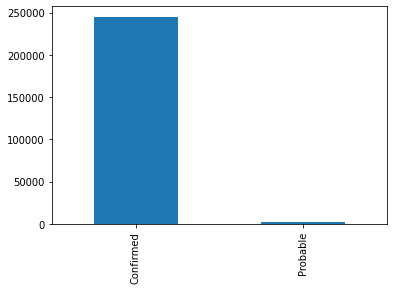

In [13]:
data['Case type'].value_counts().plot.bar()
data['Case type'].value_counts()

In [14]:
df = data[data['Case type']=='Confirmed']

In [15]:
df.head(8)

,Unnamed: 0,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
0,1,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
1,2,2021-04-21,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
2,3,2021-05-17,North Zone,Male,10-19 years,Recovered,Confirmed
3,4,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed
4,5,2021-01-05,Central Zone,Male,50-59 years,Recovered,Confirmed
5,6,2021-05-11,Edmonton Zone,Male,60-69 years,Recovered,Confirmed
6,7,2021-01-30,Calgary Zone,Female,1-4 years,Recovered,Confirmed
7,8,2021-01-20,Edmonton Zone,Female,Under 1 year,Recovered,Confirmed


In [16]:
df.sort_values('Date reported').tail(5)

,Unnamed: 0,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
112551,112552,2021-08-25,Calgary Zone,Female,20-29 years,Active,Confirmed
94060,94061,2021-08-25,Edmonton Zone,Male,80+ years,Active,Confirmed
149217,149218,2021-08-25,Edmonton Zone,Female,50-59 years,Active,Confirmed
78329,78330,2021-08-25,Calgary Zone,Male,5-9 years,Active,Confirmed
18211,18212,2021-08-25,Central Zone,Female,10-19 years,Active,Confirmed


In [17]:
df.describe(include='object')

,Alberta Health Services Zone,Gender,Age group,Case status,Case type
count,245079,245079,245079,245079,245079
unique,6,3,12,3,1
top,Calgary Zone,Male,30-39 years,Recovered,Confirmed
freq,99244,124326,47017,233731,245079


In [173]:
# Vaccine data
req = Request('https://www.alberta.ca/data/stats/lga-coverage.csv')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)
data_vac = pd.read_csv(content)

In [172]:
Alta_pop = 8842943;

# Charts of cases to date

In [18]:
print('Cases to date as of ' + df['Date reported'].max().strftime('%B %d, %Y'))

Cases to date as of August 25, 2021


,Count,Percentage
Recovered,233731,95.37
Active,8992,3.67
Died,2356,0.96


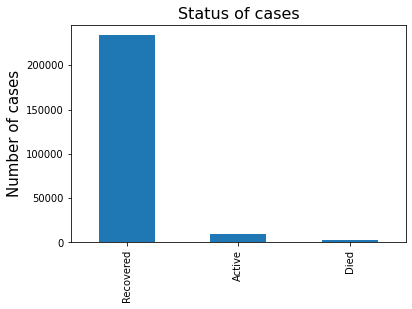

In [19]:
temp = df['Case status'].value_counts()
temp.plot.bar()
plt.ylabel("Number of cases", fontsize=15)
plt.title("Status of cases", fontsize=16)
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

,Count,Percentage
Male,124326,50.73
Female,120692,49.25
Unknown,61,0.02


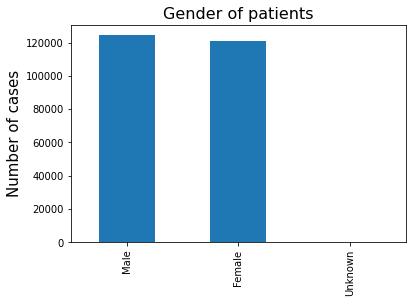

In [20]:
temp = df['Gender'].value_counts()
temp.plot.bar()
plt.ylabel("Number of cases", fontsize=15)
plt.title("Gender of patients", fontsize=16)
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

,Count,Percentage
Calgary Zone,99244,40.49
Edmonton Zone,81513,33.26
North Zone,28515,11.64
Central Zone,22041,8.99
South Zone,13751,5.61
Unknown,15,0.01


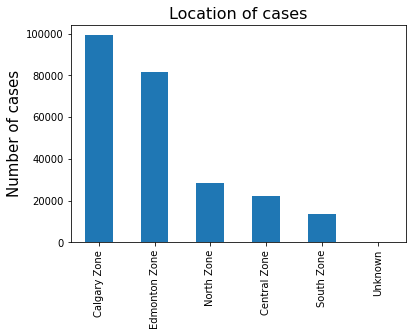

In [21]:
temp = df['Alberta Health Services Zone'].value_counts()
temp.plot.bar()
plt.ylabel("Number of cases", fontsize=15)
plt.title("Location of cases", fontsize=16)
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

In [22]:
ageix = ['Under 1 year', '1-4 years', '5-9 years', '10-19 years',
     '20-29 years', '30-39 years', '40-49 years', '50-59 years',
     '60-69 years', '70-79 years', '80+ years', 'Unknown']

,Count,Percentage
Under 1 year,1437,0.59
1-4 years,9127,3.72
5-9 years,12776,5.21
10-19 years,32938,13.44
20-29 years,45968,18.76
30-39 years,47017,19.18
40-49 years,38090,15.54
50-59 years,28081,11.46
60-69 years,16169,6.60
70-79 years,6948,2.84


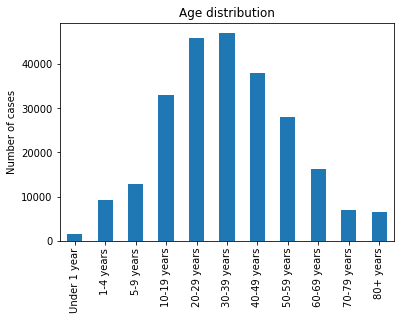

In [23]:
temp = df['Age group'].value_counts()
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp.plot.bar()
plt.ylabel("Number of cases")
plt.title("Age distribution")
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

Age distribution is skewed to the right.

Gender,Female,Male,Unknown
Age group,,,
Under 1 year,665.0,772.0,NaN
1-4 years,4422.0,4704.0,1.0
5-9 years,6056.0,6719.0,1.0
10-19 years,16051.0,16873.0,14.0
20-29 years,22578.0,23367.0,23.0
30-39 years,23126.0,23880.0,11.0
40-49 years,18942.0,19142.0,6.0
50-59 years,13636.0,14444.0,1.0
60-69 years,7714.0,8453.0,2.0


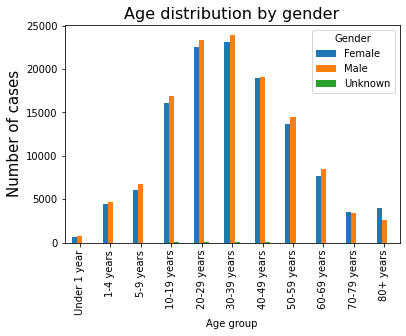

In [24]:
temp = df.groupby('Gender')['Age group'].value_counts().unstack(0)
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp.plot.bar()
plt.ylabel("Number of cases", fontsize=15)
plt.title("Age distribution by gender", fontsize=16)
temp

There is an important gender difference in the number of cases of elderly people. More males of are infected in general for age less than 70 years, but more females cases above 70 years. It would be interested to compare with the population age distribution by gender.

Gender,Female,Male
Case status,,
Active,4500.0,4485.0
Died,1041.0,1315.0
Recovered,115151.0,118526.0


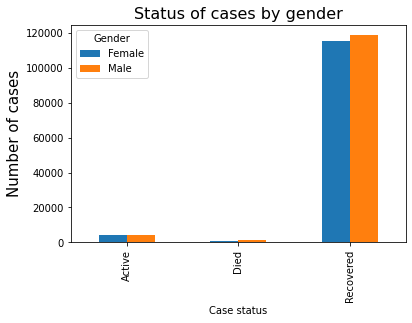

In [25]:
temp = df.groupby('Gender')['Case status'].value_counts().unstack(0)
temp = temp.drop(['Unknown'],axis=1)
temp.plot.bar()
plt.ylabel("Number of cases", fontsize=15)
plt.title("Status of cases by gender", fontsize=16)
temp

Alberta Health Services Zone,Calgary Zone,Central Zone,Edmonton Zone,North Zone,South Zone
Age group,,,,,
Under 1 year,0.005713,0.005535,0.005410,0.007400,0.006981
1-4 years,0.038381,0.032939,0.035567,0.042225,0.035561
5-9 years,0.053586,0.054172,0.047713,0.060988,0.046106
10-19 years,0.131828,0.174720,0.118146,0.151750,0.148571
20-29 years,0.190311,0.174039,0.192580,0.171986,0.192131
30-39 years,0.197717,0.159339,0.197512,0.190257,0.171406
40-49 years,0.162057,0.147997,0.151701,0.150277,0.152207
50-59 years,0.113227,0.119505,0.114736,0.115943,0.112792
60-69 years,0.061344,0.075042,0.068250,0.066564,0.070249


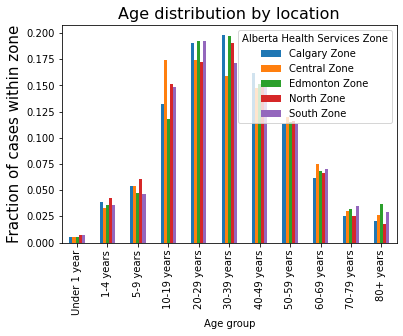

In [26]:
temp = df.groupby('Alberta Health Services Zone')['Age group'].value_counts().unstack(0)
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp = temp.drop(['Unknown'],axis=1)
temp = temp.div(temp.sum(), axis=1)
temp.plot.bar()
plt.ylabel("Fraction of cases within zone", fontsize=15)
plt.title("Age distribution by location", fontsize=16)
temp

Age distribution is very similar across zones, but there are a few interesting peaks:

 - Middle age (20-49 years) in Calgary and Edmonton (large cities)
 - Kids and teenagers (5-19 years) in North and Central Alberta (country side).
 - People older that 80 year in Edmonton.
 
It would be interesting to know why those peaks. Perhaps more contact within those groups in their zone, and more long-term care facilities in Edmonton.

Gender,Female,Male
Age group,,
Under 1 year,NaN,NaN
1-4 years,NaN,NaN
5-9 years,NaN,NaN
10-19 years,NaN,NaN
20-29 years,6.0,4.0
30-39 years,7.0,8.0
40-49 years,15.0,32.0
50-59 years,42.0,77.0
60-69 years,112.0,190.0


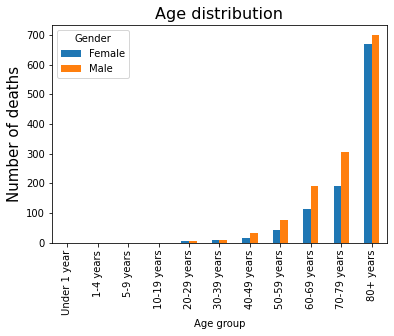

In [27]:
temp = df[df['Case status']=='Died'].groupby('Gender')['Age group'].value_counts().unstack(0)
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp.plot.bar()
plt.ylabel("Number of deaths", fontsize=15)
plt.title("Age distribution", fontsize=16)
temp

That is a significant age and sex difference in the number of deaths. Old man are at higher risk.

# Time series

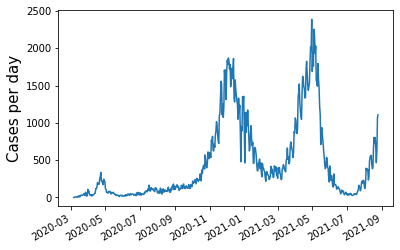

In [28]:
temp = df['Date reported'].value_counts()
temp.plot()
plt.ylabel('Cases per day', fontsize=15);

The number of case per days is not a smooth graph, use the cummulative number of cases instead.

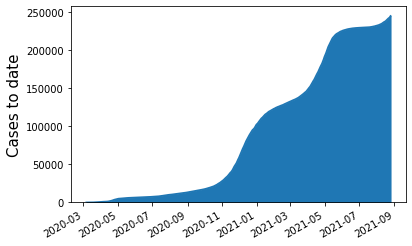

In [29]:
temp = df['Date reported'].value_counts().sort_index().cumsum()
temp.plot.area()
plt.ylabel('Cases to date', fontsize=15)
plt.title;

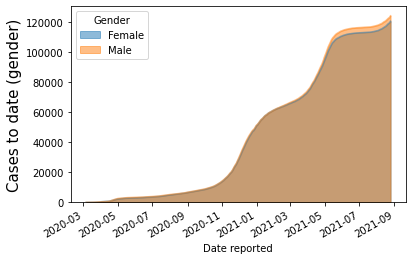

In [30]:
temp = df.groupby('Gender')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().cumsum()
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area(stacked=False)
plt.ylabel('Cases to date (gender)', fontsize=15);

The age difference is not evident in the number of cases.

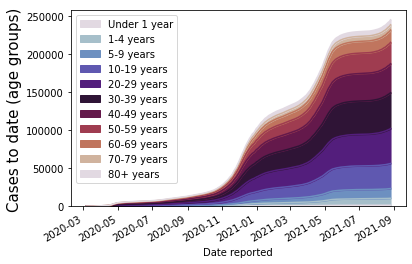

In [31]:
temp = df.groupby('Age group')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().cumsum().fillna(method="pad")
temp = temp.reindex(columns=ageix)
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area(colormap=plt.get_cmap('twilight'))
plt.legend(loc=2)
plt.ylabel('Cases to date (age groups)', fontsize=15);

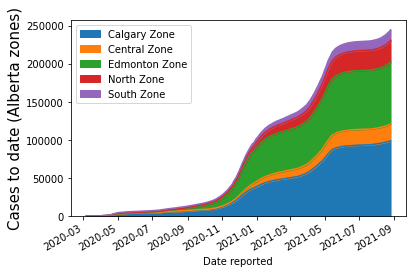

In [32]:
temp = df.groupby('Alberta Health Services Zone')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().cumsum().fillna(method="pad")
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area()
plt.legend(loc=2)
plt.ylabel('Cases to date (Alberta zones)', fontsize=15);

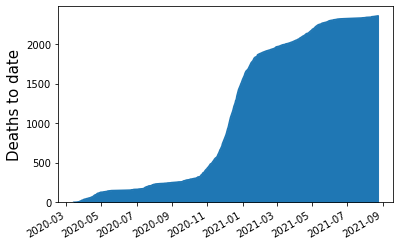

In [158]:
temp = df[df['Case status']=='Died']['Date reported']
temp = temp.value_counts().sort_index().cumsum().fillna(method="pad")
temp.plot.area()
plt.ylabel('Deaths to date', fontsize=15);

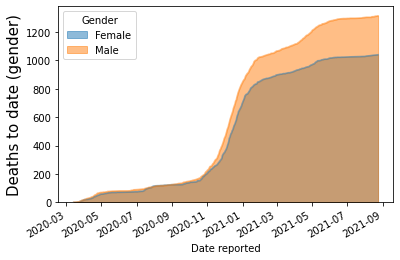

In [34]:
temp = df[df['Case status']=='Died'].groupby('Gender')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().fillna(0).cumsum().fillna(method="pad")
temp.plot.area(stacked=False)
plt.ylabel('Deaths to date (gender)', fontsize=15);

The age difference is evident in the number of deaths.

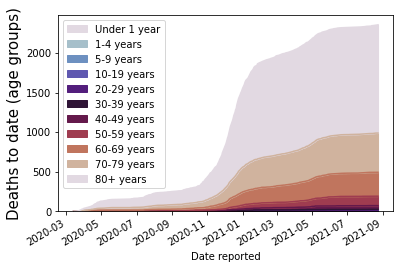

In [35]:
temp = df[df['Case status']=='Died'].groupby('Age group')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().fillna(0).cumsum().fillna(method="pad")
temp = temp.reindex(columns=ageix)
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area(colormap=plt.get_cmap('twilight'))
plt.legend(loc=2)
plt.ylabel('Deaths to date (age groups)', fontsize=15);

The risk to elderly people is outstanding.

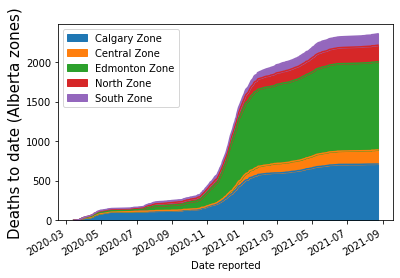

In [36]:
temp = df[df['Case status']=='Died'].groupby('Alberta Health Services Zone')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().fillna(0).cumsum().fillna(method="pad")
temp.plot.area()
plt.legend(loc=2)
plt.ylabel('Deaths to date (Alberta zones)', fontsize=15);

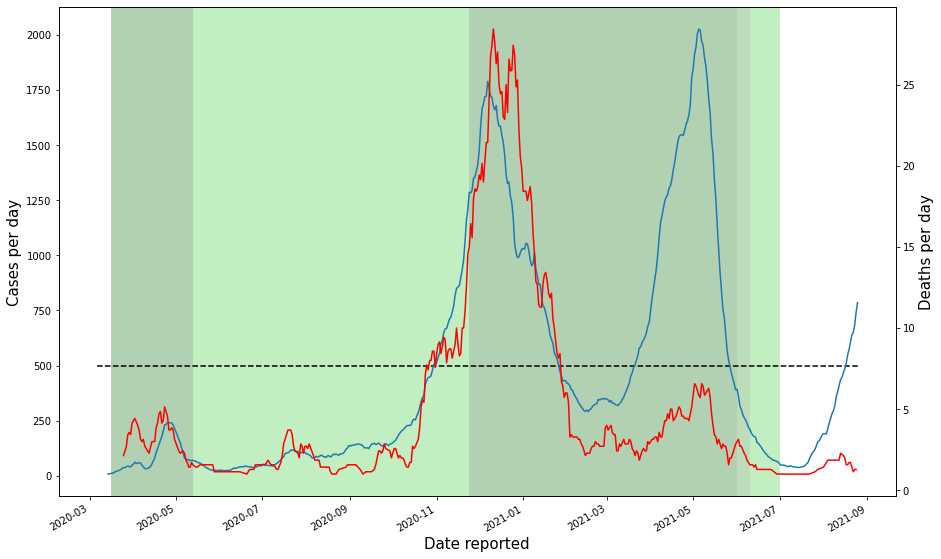

In [205]:
fig, ax = plt.subplots(figsize=(15, 10))

temp = df['Date reported'].value_counts().sort_index().fillna(0).rolling(7).mean()
temp.plot()
plt.axvspan('2020-03-16', '2020-05-13', facecolor='darkgreen', alpha=0.3)
plt.axvspan('2020-05-13', '2020-11-24', facecolor='limegreen', alpha=0.3)
plt.axvspan('2020-11-24', '2021-06-01', facecolor='darkgreen', alpha=0.3)
plt.axvspan('2021-06-01', '2021-06-10', facecolor='forestgreen', alpha=0.3)
plt.axvspan('2021-06-10', '2021-07-01', facecolor='limegreen', alpha=0.3)
plt.hlines(500, temp.index.values.min(), temp.index.values.max(), linestyle='dashed', color='black')
ax.set_xlabel('Date reported', fontsize=15)
ax.set_ylabel('Cases per day', fontsize=15)

temp1 = df[df['Case status']=='Died']['Date reported'].value_counts().sort_index().fillna(0)
temp2 = df['Date reported'].value_counts().sort_index().fillna(0)
temp = (temp1).fillna(0).rolling(7).mean()
ax2 = ax.twinx()
temp.plot(color='red', ax = ax2)
ax2.set_xlabel('Date reported', fontsize=15)
ax2.set_ylabel('Deaths per day', fontsize=15);
# https://calgaryherald.com/news/local-news/covid-19-at-one-year-a-timeline-of-the-pandemic-in-alberta